# **Data representation, reduction and analysis**
# **Youtube Comments Spam Classifier**

The dataset used in this project is a collection of YouTube comments made from users in music videos of artists: Psy, Katy Perry, LMFAO, Eminem, and Shakira.

In these datasets, there is a class column where (0) indicates that it is not a spam comment (ham comment) and (1) if it is spam comment .

We will use this dataset to build models that will classify the comments as spam or ham .


In [1]:
!pip install emoji

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from collections import Counter
from wordcloud import WordCloud
import nltk
import html
import re
import string
import emoji

In [3]:
nltk.download('punkt') #download the punkt package from the nltk kit.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Importing dataset.**
First off we will be importing the datasets using the pandas library. the dataset from each csv file is merged into a variable called frames. ignore_index which is False in default is set to True so the resulting index will be written 0,1..n-1. **Please run one of the following cells, either you are running the notebook locally or using colab**

If executing in colab:

In [4]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames, ignore_index=True)
df.to_csv("not_clean.csv")

If executing locally:

In [5]:
df1 = pd.read_csv('data\Youtube01-Psy.csv')
df2 = pd.read_csv('data\Youtube02-KatyPerry.csv')
df3 = pd.read_csv('data\Youtube03-LMFAO.csv')
df4 = pd.read_csv('data\Youtube04-Eminem.csv')
df5 = pd.read_csv('data\Youtube05-Shakira.csv')

frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames, ignore_index=True)

The shape of the concatenated dataframe **df** is:


In [6]:
print(df.shape)

(1956, 5)


Here we can see what the columns of the datasets comprise of :

In [7]:
print(df.columns)

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')


We can observe on the following table, the first 5 comments. Each row represents a comment and the columns show details about each comment. We are interested in the last 2 columns, **CONTENT** and **CLASS**.  The **CONTENT **column contains the contents of all the comments. The **CLASS **column specifies if the comment is classifiead as spam or legitimate(ham).

In [8]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


## **Exploratory Data Analysis (EDA).**
Distribution by label: Spam count is slightly more than spam although not significant.

Text(0.5, 1.0, 'Frequency of Ham(0) & Spam(1)')

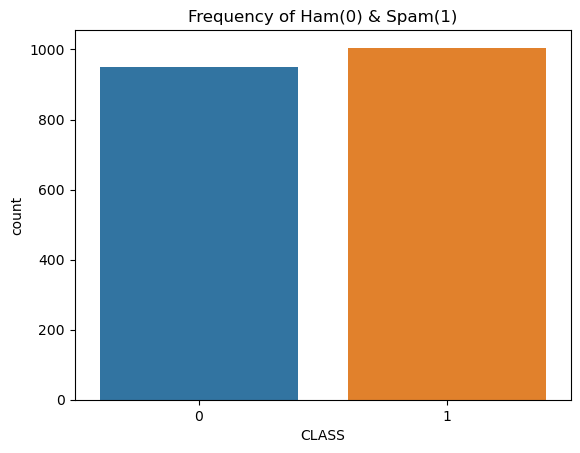

In [9]:
sb.countplot(x='CLASS',data=df).set_title("Frequency of Ham(0) & Spam(1)")

Now we can explore the average length of a spam or a ham. First we obtain the lenght of each comment and storing them in a new column called "comment_len".

In [10]:
df['comment_len'] = df['CONTENT'].apply(len)
df.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,comment_len
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


The describe method from the Pandas library gives us descriptive statistics that summarize the tendency, dispersion and the dataset distribution.

In [11]:
df.groupby('CLASS').describe()

comment_len                                                         
            count        mean         std   min   25%   50%    75%     max
CLASS                                                                     
0           951.0   49.644585   56.284782   2.0  18.0  34.0   62.0   753.0
1          1005.0  137.336318  158.977404  10.0  36.0  65.0  171.0  1200.0

Let's visualize distribution pattern of comment length by plotting a boxplot and normalized histgram. We can see that Spam messages are in general consists of more words compared to ham which makes sense because a comment unrelated to the video might been a comment which is trying to lure viewers into their site as compared to the normal comments in a youtube video.

<AxesSubplot:xlabel='CLASS', ylabel='comment_len'>

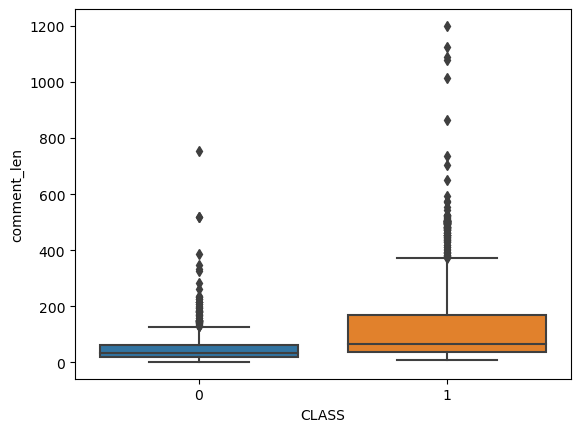

In [12]:
sb.boxplot(x='CLASS', y='comment_len', data=df)

In [13]:
spam_comments = df[df["CLASS"] == 1]["CONTENT"]
ham_comments = df[df["CLASS"] == 0]["CONTENT"]
all_comments = df["CONTENT"]

spam_words = ''
ham_words = ''
all_words = ''

"insert all available words in the column individually and count the most occuring word into an empty string"
for word in spam_comments:
    text = word.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for word in ham_comments:
    text = word.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

for word in all_comments:
    text = word.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        all_words = all_words + words + ' '

In [14]:
spamcloud = WordCloud(width=300, height=300).generate_from_text(spam_words)
hamcloud = WordCloud(width=300, height=300).generate_from_text(ham_words)
allcloud = WordCloud(width=300, height=300).generate_from_text(all_words)

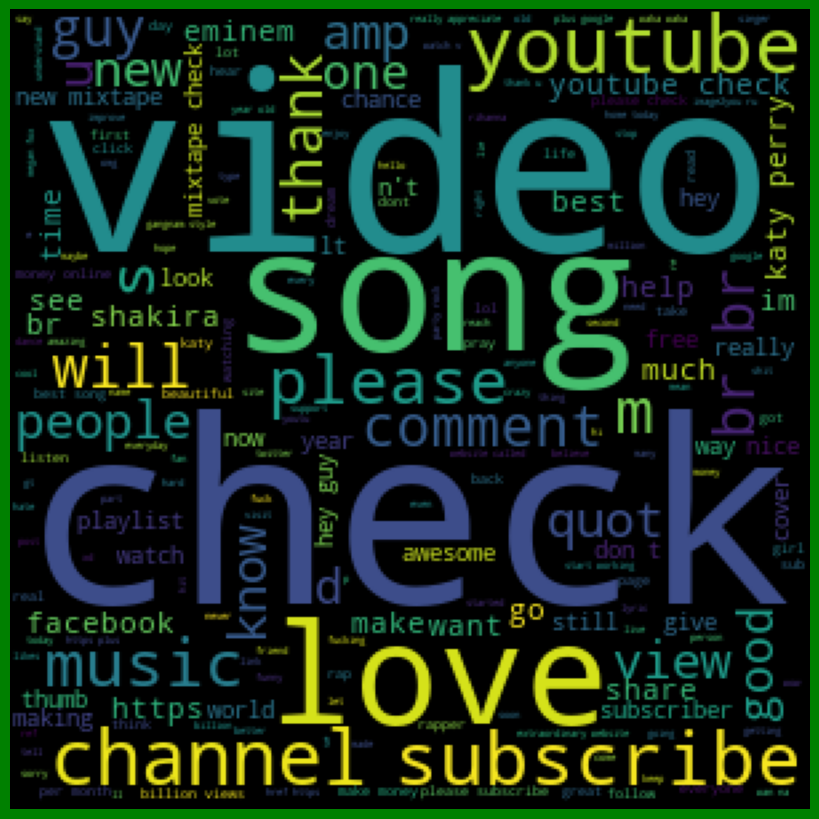

In [15]:
#All words in the dataset Word cloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(allcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

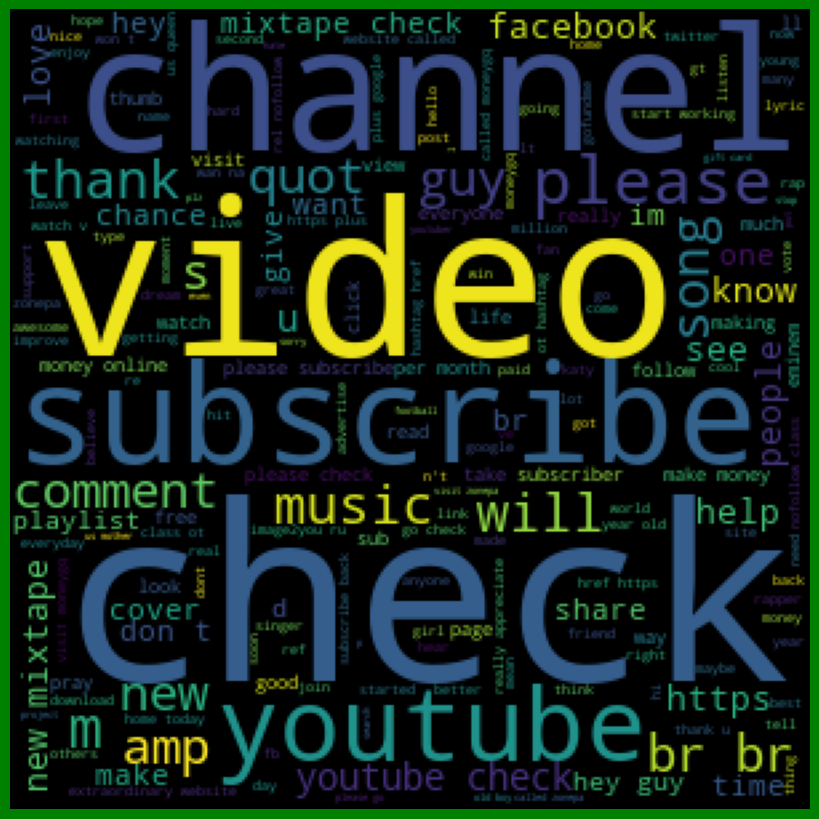

In [16]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(spamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

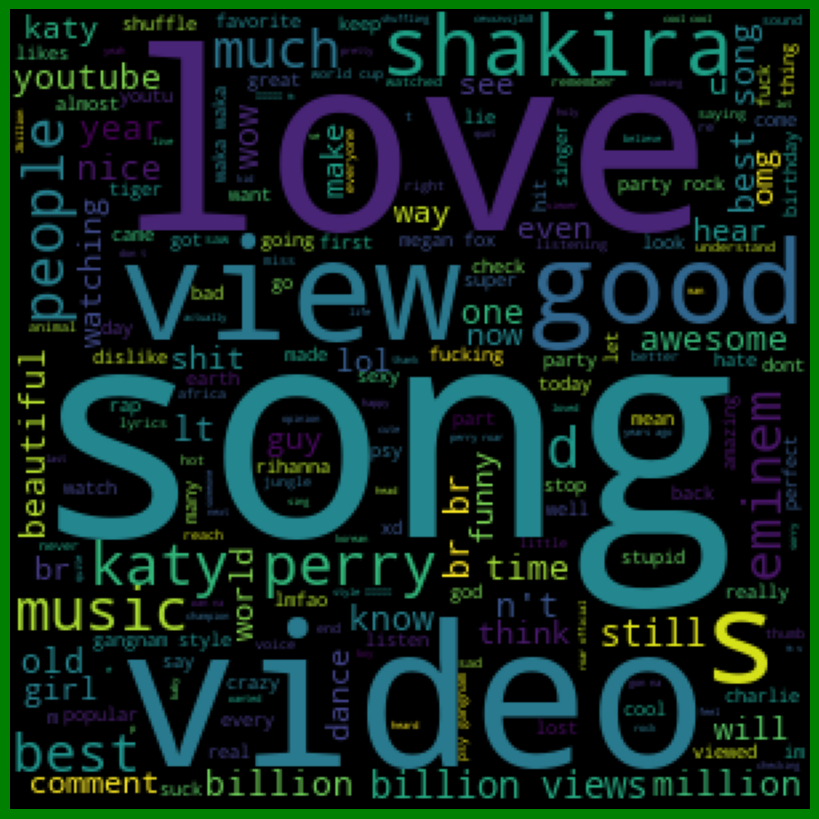

In [17]:
#Ham Word cloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(hamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We can see from the wordcloud that words in spam comments consist lots words that doesn't relate to the video which in this case are music videos. The words that exist consist of lots of words such as 'check', 'subscribe', 'please', 'help', which are comments to lure people to check or subscribe to their channel which is clearly spam words. 

Looking at the word cloud for all words, we can see that the word 'check', 'subscribe', 'please' is one of the most populated words in the dataset. These frequent words can be an explaination for the variability in end spam classification. 

C:\Users\kaila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


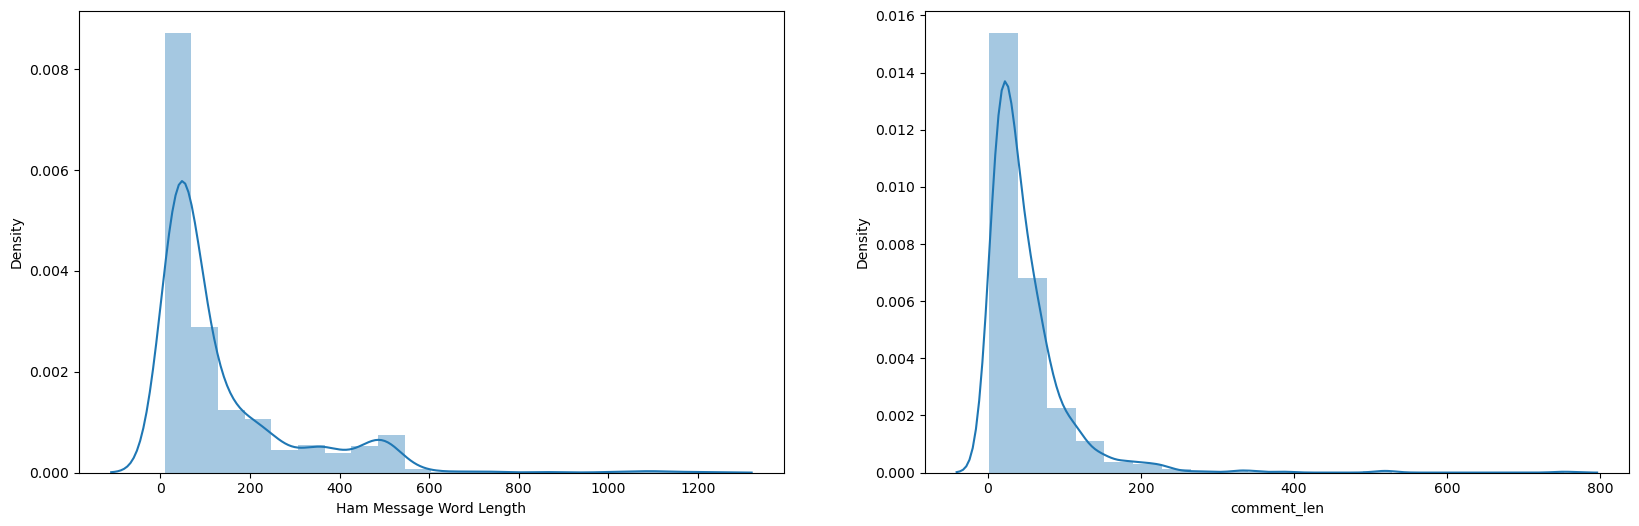

In [18]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sb.distplot(df[df["CLASS"] == 1]["comment_len"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Messages Word Length")

sb.distplot(df[df["CLASS"] == 0]["comment_len"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [19]:
df.comment_len.describe()

count    1956.000000
mean       94.700920
std       128.222062
min         2.000000
25%        29.000000
50%        48.000000
75%        97.000000
max      1200.000000
Name: comment_len, dtype: float64

In [20]:
# Let's see the longest message 1200
df[df['comment_len'] == 1200]['CONTENT'].iloc[0]

'&lt;script&gt;document.write(\'&lt;a target="_self" href=" http://rover.ebay.com/rover/1/710-53481-19255-0/1?icep_ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;ipn=psmain&amp;icep_vectorid=229508&amp;kwid=902099&amp;mtid=824&amp;kw=lg"&gt;check  this out new arive on ebay&lt;/a&gt;&lt;img  style="text-decoration:none;border:0;padding:0;margin:0;" src=" http://rover.ebay.com/roverimp/1/710-53481-19255-0/1?ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;mpt=\'+Math.floor(Math.random()*999999999)+\'"&gt;\');&lt;/script&gt;&lt;noscript&gt;&lt;a  target="_self" href=" http://rover.ebay.com/rover/1/710-53481-19255-0/1?icep_ff3=1&amp;pub=5575096797&amp;toolid=10001&amp;campid=5337555197&amp;customid=bogdan+grigore&amp;ipn=psmain&amp;icep_vectorid=229508&amp;kwid=902099&amp;mtid=824&amp;kw=lg"&gt;check  this out new arive on ebay&lt;/a&gt;&lt;img  style="text-decoration:none;border:0;padding:0;ma

## **Dataset Cleaning.**
On this subsection we are going to proceed with the cleaning of the dataset.

We only need data from COMMENT and CLASS column. So, we will drop the other columns that are not revelant to this project.



In [21]:
df = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'comment_len'], axis=1)

In [22]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


First we will lowercase all the comments, and then we will replace all the URLs with the keyword **htmllink**.

In [23]:
df["CONTENT"] = df["CONTENT"].str.lower() # Lowercase all the words in the df column "CONTENT"
df['CONTENT'] = df['CONTENT'].str.replace("(<a.+>)","htmllink") # Replace all the html tags <a... > with the keyword "htmllink"
df['CONTENT'] = df['CONTENT'].str.replace("(<.+>)","") # Remove all other html tags.
df['CONTENT'] = df['CONTENT'].str.replace(r'(https?://\S+|http?://\S+ )',"htmllink") # Replace all the strings starting with "http" or "https" with the keyword "htmllink"
df["CONTENT"] = df["CONTENT"].str.replace(r"\S*.com\S*|\S*watch\?\S*","htmllink") # Replace all the strings containing ".com"  or "watch\"  with the keyword "htmllink"

C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\1022203764.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CONTENT'] = df['CONTENT'].str.replace("(<a.+>)","htmllink") # Replace all the html tags <a... > with the keyword "htmllink"
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\1022203764.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CONTENT'] = df['CONTENT'].str.replace("(<.+>)","") # Remove all other html tags.
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\1022203764.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CONTENT'] = df['CONTENT'].str.replace(r'(https?://\S+|http?://\S+ )',"htmllink") # Replace all the strings starting with "http" or "https" with the keyword "htmllink"
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\1022203764.py:5: FutureWarning: The default value of regex will change from T

We will create 3 funtions:

*   **clean_nonalpha:** removes all the nonalphabethic characters from the comments.
*   **translate_emojis:** since a lot of comments contain emojis, we will translate them to a keyword representation using the library "emoji".
*   **clean_only_numbers:** we will remove the words containing just numbers.




In [24]:
def clean_nonalpha(input_text):
  pattern = re.compile('([^\s\w]|)+')
  return pattern.sub("",input_text)

In [25]:
def translate_emojis(input_text):
  return emoji.demojize(input_text, delimiters=(" ", " "))

In [26]:
def clean_only_numbers(input_text):
  return ' '.join(word for word in input_text.split() if not word.isdigit())

In [27]:
df["CONTENT"]=df["CONTENT"].apply(translate_emojis)
df["CONTENT"]=df["CONTENT"].apply(clean_nonalpha)
df["CONTENT"]=df["CONTENT"].apply(clean_only_numbers)

Now that we have cleaned the dataset, let's observe the words cloud.

In [28]:
clean_spam_comments = df[df["CLASS"] == 1]["CONTENT"]
clean_ham_comments = df[df["CLASS"] == 0]["CONTENT"]

spam_words = ''
ham_words = ''

for word in clean_spam_comments:
    text = word.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for word in clean_ham_comments:
    text = word.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '


In [29]:
clean_spamcloud = WordCloud(width=300, height=300).generate_from_text(spam_words)
clean_hamcloud = WordCloud(width=300, height=300).generate_from_text(ham_words)

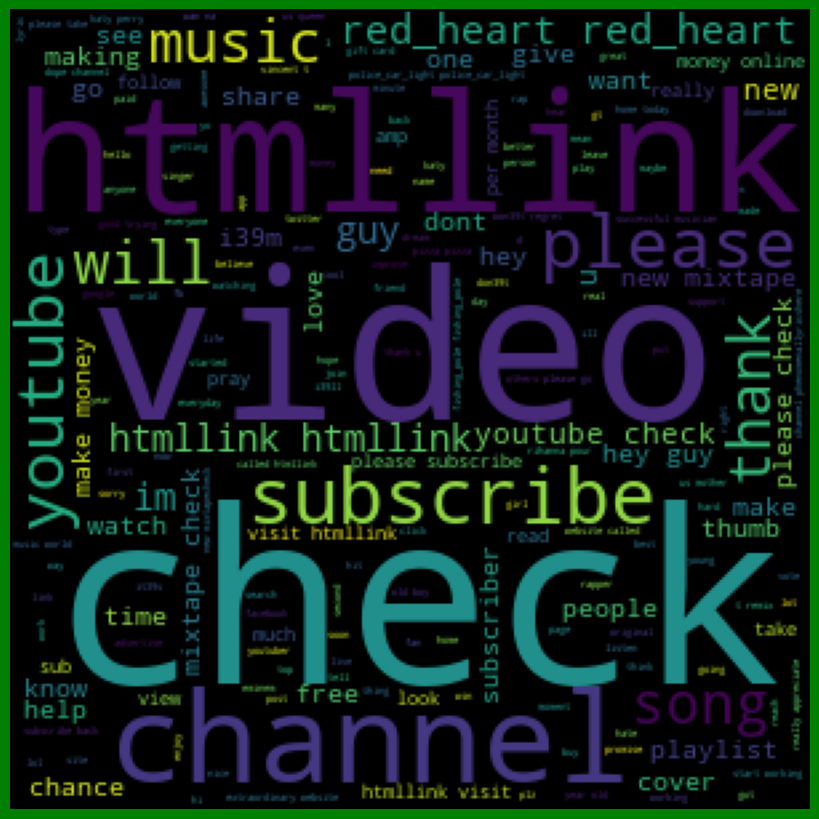

In [30]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(clean_spamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

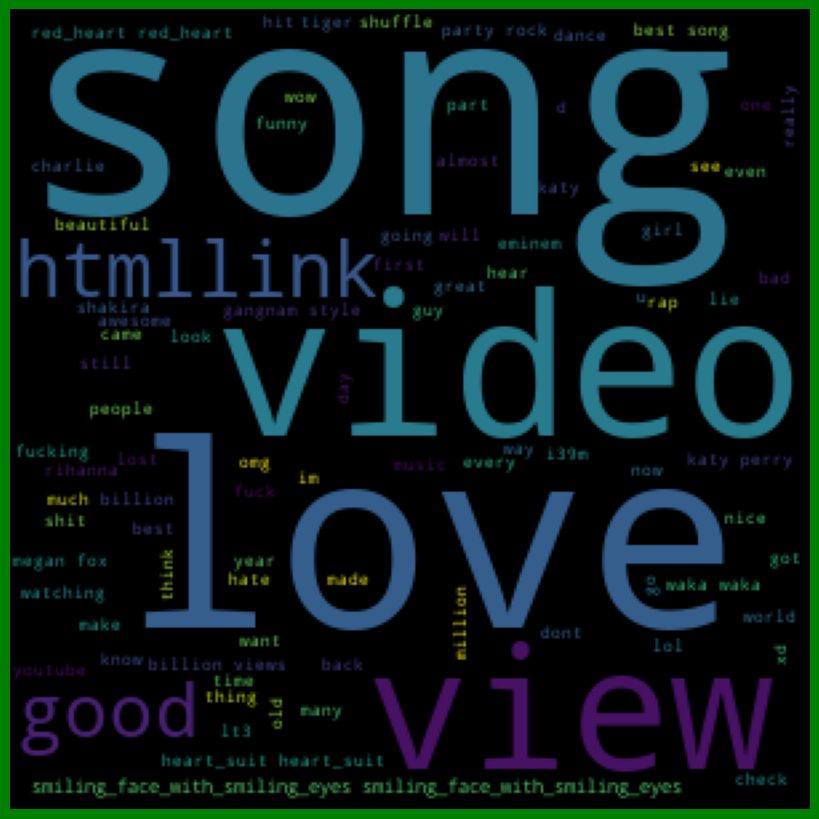

In [31]:
#Ham Word cloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(clean_hamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We can observe now that both wordclouds offer us a wider look at the content of the comments. It is possible to see that both ham and spam comments contain html links to other videos which overrides the assumption that just spam comments contains links to other videos. Ham comments also contain links to the same video to link a specific time or frame of interest for the user.

In order to apply a classification ML algorithm, we first need to get a numerical representation of all the comments. We are going to use two **Word Embeddings models** using Natural Language Processing techniques to map the comments into vectors of real numbers.



## **Model 1: Bag of Words.**

Bag of Words (BoW) is an algorithm that counts how many times a word appears in a document. It’s a tally where the word counts in every document or in our case the comments allow us to compare documents and gauge their similarities for spam or ham classification.

BoW works by listing words and have them paired with their word counts per document. In the table where the words and documents that effectively become vectors are stored, each **row is a word**, each **column is a document**, and each cell is a word count given by for example in "[1 0 1 0]". Each of the documents in the corpus is represented by columns of equal length which are the wordcount vectors, an output stripped of context.

In the approach below, we will create a vocab set, that stores all the words used on all the dataset, and after that each comment will be represented by a vector of the size of the vocabulary: so for example the sentence "hello word" is going to be represented as [ 0 0 1 0 1] ( considering that our vocabulary contains just 5 words { word1 word2 hello word3 world} which we will then fit it into a classifier.

In [37]:
vocab = []
for sentence in df["CONTENT"]:
  for word in sentence.split():
    vocab.append(word)

The vocabulary contains all the distinct words in the dataset.

In [38]:
# Eliminate duplicate words in the vocabulary
vocabulary = set(vocab)
print(len(vocabulary))

3847


For every word in the vocabulary we are going to create a new column in the dataset.

In [39]:
for word in vocabulary:
  df[word] = 0

For every ocurrence of a word in a sentence (comment) we are going to increment the counter of each word by one.

In [40]:
for index, sentence in enumerate(df["CONTENT"]):
  for word in sentence.split():
    df[word].iloc[index] += 1  


C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3019873311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[word].iloc[index] += 1


Now we can create two sub dataframes containing the words embeddings for spam and ham comments.

In [41]:
df_spam =df[df["CLASS"] == 1]
df_spam.loc['Total']= df_spam.sum(numeric_only=True, axis=0)
df_spam.tail()

C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3032196242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam.loc['Total']= df_spam.sum(numeric_only=True, axis=0)


,CONTENT,CLASS,isnt,shrek,gonna,giveaway,rappersongwriter,idiotic,duh,anything,...,tiger_face,adore,producers,stephanie,american,smartie,jus,public,uplifting,wake
1944,hey music fans i really appreciate all of you ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1947,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,1005.0,2.0,1.0,7.0,1.0,1.0,1.0,1.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0


In [42]:
print(df_spam.shape)

(1006, 3849)


In [43]:
df_not_spam =df[df["CLASS"] == 0]
df_not_spam.loc['Total']= df_not_spam.sum(numeric_only=True, axis=0)
df_not_spam.tail()

C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3539017560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_spam.loc['Total']= df_not_spam.sum(numeric_only=True, axis=0)


,CONTENT,CLASS,isnt,shrek,gonna,giveaway,rappersongwriter,idiotic,duh,anything,...,tiger_face,adore,producers,stephanie,american,smartie,jus,public,uplifting,wake
1952,i love this song for two reasons 1it is about ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,wow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,shakira u are so wiredo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1955,shakira is the best dancer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,1.0


In [44]:
print(df_not_spam.shape)

(952, 3849)


We can observe that now the dimension of the matrix containing a representation of the comments as vectors is (1956,3851) where 1956 represents the total number of comments (rows) and 3851 represent the number of words (columns) in our vocabulary. We can directly realize one major downside from this simple word embedding, the number of columns increases as our vocabulary also increases, for a big dataset this may represent a problem, but in our case, since the datasets used are not big at all, it will not harm the training performance of our model.

Drop the first two columns of each dictionary.

In [45]:
df_spam.drop("CONTENT",1,inplace=True)
df_spam.drop("CLASS",1,inplace=True)
df_not_spam.drop("CONTENT",1,inplace=True)
df_not_spam.drop("CLASS",1,inplace=True)

C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3511102256.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_spam.drop("CONTENT",1,inplace=True)
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3511102256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam.drop("CONTENT",1,inplace=True)
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3511102256.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_spam.drop("CLASS",1,inplace=True)
C:\Users\kaila\AppData\Local\Temp\ipykernel_11904\3511102256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

We create a dictionary from each dataframe created for spam and ham comments.

In [46]:
dict_spam = {word: count for word, count in zip(df_spam.columns,df_spam.loc['Total'])}
dict_not_spam = {word: count for word, count in zip(df_not_spam.columns,df_not_spam.loc['Total'])}

We can now sort the dictionaries and obtain the most frequent words in the spam and ham dictionaries.

In [47]:
sorted_spam = sorted(dict_spam.items(),key=lambda x: x[1], reverse=True)
sorted_not_spam = sorted(dict_not_spam.items(),key=lambda x: x[1], reverse=True)
print(sorted_spam[:10])
print(sorted_not_spam[:10])
print("lenght of dictionaries: ", len(sorted_spam))


[('out', 569.0), ('check', 545.0), ('htmllink', 514.0), ('my', 512.0), ('and', 485.0), ('to', 480.0), ('you', 463.0), ('i', 457.0), ('the', 413.0), ('a', 389.0)]
[('this', 293.0), ('i', 284.0), ('the', 278.0), ('song', 217.0), ('is', 214.0), ('love', 144.0), ('to', 133.0), ('and', 132.0), ('a', 114.0), ('it', 112.0)]
lenght of dictionaries:  3847


We can observe that the lenght of both dictionaries is 3849, which means that after cleaning the dataset, we have 3849 words in our vocabulary.

### **Classification.**
For classification there are some famous classification algorithms and we are going to use the below classification algorithms with this data set and see their prediction results The Algorithms used below in this notebooks are :

- K-Nearest Neighbour
- Support Vector Machine 

We have chosen these classifiers because they tend to have a decent performance for this type of dataset and typically do not need much setup.

In [48]:
X = df.iloc[:,2:]
y = df.iloc[:,1]
pd.crosstab(index=y,columns="Count")

col_0,Count
CLASS,
0,951
1,1005



We are going to use the **Hold Out Validation** method for our classifiers. it basically consist on dividing the dataset into 2 parts, a training dataset and a testing dataset. We are going to apply the standard segmentation commmonly used that is 75% of the dataset correspond to the training dataset and the rest for the testing dataset.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### **Support Vector Machines: linear RBF.**


We have tried using a linear kernel and as can be seen on the figure below, it isn't desirable with accuracy at 50%.

<div>
<img src="attachment:linear.png" width="500">
</div>

We then tried to use GridSearchCV from the scikit library to determine which C and gamma hyperparameters ensure a good result for the classifier. C being the regularization parameter of the error term. While gamma is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’.

In [50]:
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'), 'C':[1,2,3], 'gamma': 
              [0.01,0.02,0.03]}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters)
clf = grid.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
print(clf)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': [0.01, 0.02, 0.03],
                         'kernel': ('linear', 'rbf')})


We can see from the above the best C hyperparameter is 1 and the best kernel to be used on a BoW model is the rbf kernel.

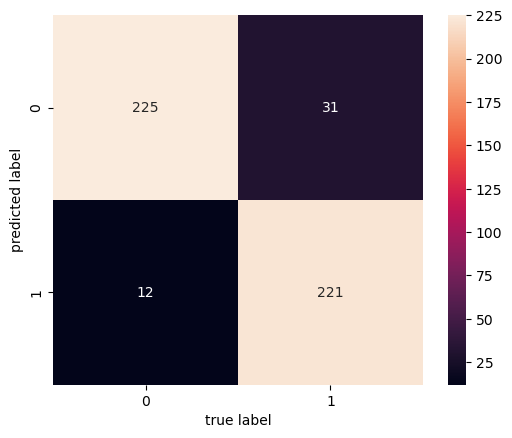

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_svm = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred_svm) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [52]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       237
           1       0.95      0.88      0.91       252

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489



#### **K-Nearest Neighbors.**
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure, in this case we will use the euclidean distance as the similarity metric.

The KNN algorithm has 3 stages:

Step 1: Calculate Euclidean Distance.

Step 2: Get Nearest Neighbors.

Step 3: Make Predictions.

Evaluating the Algorithm

In [53]:
class KNN:
  """
  Class that creates an instance of a KNN classifier using the euclidean
  distance as the similarity metric.
  """
  def __init__(self,X_train,X_test,y_train,y_test,k):
    
    """
    @param self
    @param X_train: training points array.
    @param X_test: testing points array.
    @param y_train: training labels.
    @param y_test: testing labels.
    @param k: k nearest neighbors.
    """
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.k = k
    self.targets = y_test

  def euclidean(self,A, B):

    """
    Calculates the euclidean distance matrix between 2 input matrices. Performs
    step 1.
    @param A: input matrix A.
    @param B: input matrix B.
    @return: euclidean distance matrix.
    """
    n, d = A.shape
    m, d1 = B.shape
    assert d == d1, 'Incompatible shape'
    A_squared = np.sum(np.square(A), axis=1, keepdims=True)
    B_squared = np.sum(np.square(B), axis=1, keepdims=True)
    AB = np.matmul(A, B.T)
    distances = np.sqrt(A_squared - 2 * AB + B_squared.T)
    return distances
  def evaluate(self):
    """
    Evaluates the accuracy of the predictions
    @return: accuracy
    """
    acc = np.mean(self.predictions == self.targets)
    return acc
  def run(self):
    """
    Get the nearest neighbors and make predictions. Performs steps 2 and 3.
    @returns: predictions
    """
    distances = self.euclidean(self.X_test, self.X_train)
    n_test = self.X_test.shape[0]
    n_classes = len(np.unique(self.y_train))
    self.predictions = np.zeros(n_test, dtype=np.int8)
    nn_indices = np.argsort(distances,axis=1)[:,:self.k]
    votes = np.zeros((n_test, n_classes))
    for j in range(self.k):
        votes[np.arange(n_test) , self.y_train[nn_indices[:,j]]] += 1
    self.predictions = np.argmax(votes,axis=1)
    return self.predictions


In [54]:
k = 3
knn = KNN(X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy(),k)
y_pred_knn = knn.run()
acc = knn.evaluate()


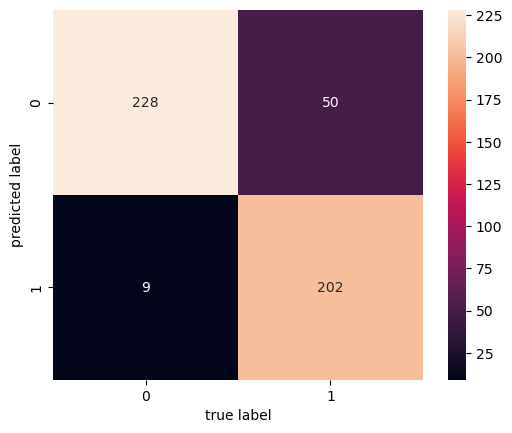

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
mat = confusion_matrix(y_test, y_pred_knn) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       237
           1       0.96      0.80      0.87       252

    accuracy                           0.88       489
   macro avg       0.89      0.88      0.88       489
weighted avg       0.89      0.88      0.88       489



We can calculate the accuracy for different k values, and see which k value is suitable.

In [57]:
acc_list = []
for i in range(1, 5):
    knn_i = KNN(X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy(),i)
    pred_i = knn_i.run()
    #pred_i = knn.predict(X_test)
    acc_list.append(knn_i.evaluate())

In [58]:
print(acc_list)

[0.8650306748466258, 0.852760736196319, 0.8793456032719836, 0.8507157464212679]


Text(0, 0.5, 'Accuracy')

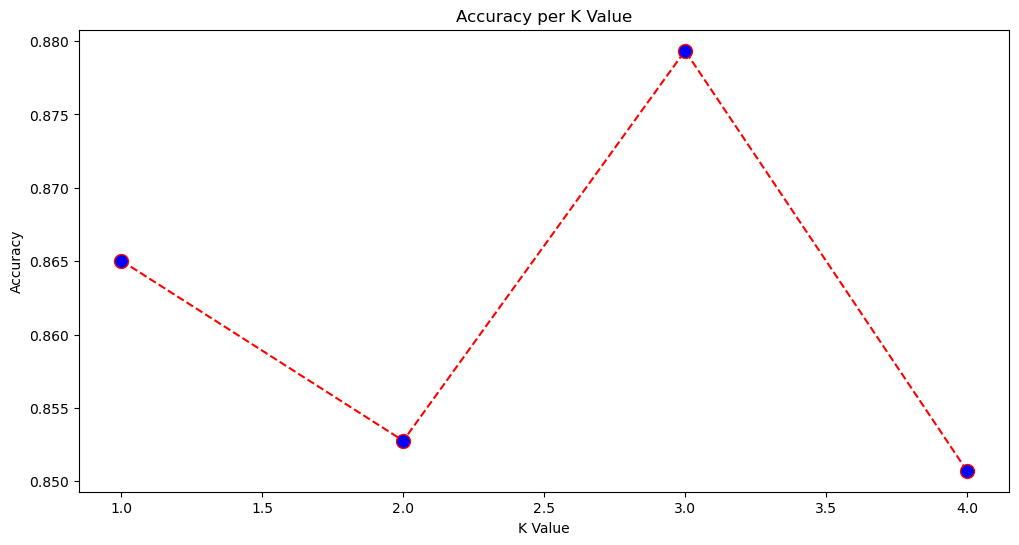

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), acc_list, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy per K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

The accuracy almost remain the same for all the k values in the range of 1 to 4, but the higher accuracy was achieved why k=3.

### **Accuracy comparison.**

In [60]:
from sklearn.metrics import accuracy_score
print('Accuracy score for linear kernel (rbf): {}'.format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score for KNN (k=3): {}'.format(accuracy_score(y_test, y_pred_knn)))

Accuracy score for linear kernel (rbf): 0.9120654396728016
Accuracy score for KNN (k=3): 0.8793456032719836


We can see the linear kernel rbf have the best score over other classification algorithms.

## **Model 2: Word2Vec.**

In the previous section we have seen how the result for the bag of words model, now we will use another embedding approach which is word2vec and then train the neural model with the dictionary of words of the dataset, where this will capture semantic relationships between words, and also reduce the number of features. 

Word2vec produces one vector per word which is great for going deeper into the documents we have and helps in identifying content and subsets of content. Its vectors represent each word’s context.

Word2Vec is a word embedding technique that uses a two-layer neural network. The input to the arrangement of neural networks is a text corpus and the ouput is a set of trained vectors. It trains words against each other, using 2 exclusive techniques: Continuous Bag-of-Words (CBOW) and Skip-gram.


1.   **CBOW**: predicts target words from the surrounding context words.
2.   **Skip-gram**: predicts surrounding context words from the target words, which is basically the inverse process of CBOW.

Word2Vec is a simple neural network with a single hidden layer and during the  training process, its goal is to adjust the weights to reduce a loss function. However, Word2Vec is not going to be used for the task it was trained on, instead, it will just take its hidden weights after the training process, use them as the word embeddings, and throw away the rest of the model.




In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [65]:
import spacy
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [66]:
!python -m spacy download en

     --------------------------------------- 12.8/12.8 MB 25.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


For the Word2Vec implementation, we are going to create a class that contains three methods:
  

*   **clean_sentence**: Performs further cleaning of a comment in the dataset, specifically lemmatization and removing of stop words.
*   **clean_document**: Calls the clean_sentence method for all the comments, and drop duplicate comments (if there exists).
*   **run**: Executes the training process of the word2vec word embedding model.



In [ ]:
class W2V_embedding:
  """
  Creates and trains a Word2Vec model using the gensim library.
  """
  def __init__(self, document, lemma, stopwords, min_count, window, nlp):

    """
    @param self
    @param document: document that contains the sentences to be transformed into word2vec vectors.
    @param lemma: true if the sentences will be lemmatized, false otherwise.
    @param stopwords: true if the stopwords will be removed, false otherwise.
    @param min_count: minimun number of ocurrences of a word in order to be added to the model during the training process.
    @param window: context window for words during the training process.
    @param nlp: spacy loaded model.
    @return:
    """
    self.document = document
    self.nlp = nlp
    self.lemma = lemma
    self.stopwords = stopwords
    self.min_count = min_count
    self.window = window
  def clean_sentence(self, sentence):
    """
    Cleans a input sentence(comment); removes stopwords and/or lemmatizes the
    input comments.
    @param sentence: the input sentence (comment)
    @return: a clean sentence.
    """
    # Lemmatizes and removes stopwords
    if self.lemma and self.stopwords: #will lemmatize and remove stopwors if both params are true
      txt = [token.lemma_ for token in sentence if not token.is_stop]
    elif self.lemma: # only performs lemmatization
      txt = [token.lemma_ for token in sentence ]
    elif self.stopwords: # only removes stopwords
      txt = [token for token in sentence if not token.is_stop]
    return ' '.join(txt)
  def clean_document(self):
    """
    Cleans a document (set of comments).
    @return: a cleaned document.
    """
    #Clean and drop duplicates from the comments in the dataset.
    txt = [self.clean_sentence(sentence) for sentence in self.nlp.pipe(self.document, batch_size=500, n_threads=-1)]
    df_clean = pd.DataFrame({'clean': txt})
    df_clean = df_clean.dropna().drop_duplicates()
    sentences = [row.split() for row in df_clean['clean']]
    return sentences
  def run(self):
    """
    Creates a Word2Vec model using the gensim library implementation. Construct 
    a vocabulary and then trains the model.
    @return: euclidean distance matrix.
    """
    self.sentences = self.clean_document()
    cores = multiprocessing.cpu_count() # set cores equal to the number of cpu cores
    w2v_model = Word2Vec(min_count=self.min_count,
                     window=self.window,
                     size=300,
                     workers=cores-1)
    w2v_model.build_vocab(self.sentences, progress_per=100) # build aa vocabulary from the senquence of input sentences.
                                                            # progress_per: how many words to process before updating the progress.
    w2v_model.train(self.sentences, total_examples=w2v_model.corpus_count, epochs=50, report_delay=1) # train, use and evaluates the neural networks.
    w2v_model.init_sims(replace=True) #normalize the word2vec vectors (L2 norm)
    return w2v_model


For the training process, it is important to set up the min_count value to 1,
since we have a small vocabulary and we would like to obtain a representation for every word in the dataset. min_count basically states that all the words with a frequency below min_count will be ignored.
Gensim Word2Vec modeling returns an instace of KeyedVectors, in order to transform those instances to normed vector we will use the method init_sims().

In [ ]:
lemmatizer = True
remove_stopwords= True
nlp = spacy.load('en', disable=['ner','parser']) # We will disable the in-build Named Entity Recognizer and the Synthatic Dependency Parser.
init_w2v = W2V_embedding(min_count=1, window=5, lemma=lemmatizer, stopwords=remove_stopwords, document=df["CONTENT"], nlp=nlp)
w2v_model = init_w2v.run()

In [ ]:
w2v_model.wv.most_similar(positive=["subscribe"])

[('thank', 0.9747747182846069),
 ('want', 0.9606512784957886),
 ('upload', 0.9497856497764587),
 ('decent', 0.9490154981613159),
 ('trailer', 0.9428814649581909),
 ('thumb', 0.9416617155075073),
 ('you39re', 0.9394250512123108),
 ('lot', 0.9366173148155212),
 ('sub', 0.9323047995567322),
 ('czfcxsn0jnq', 0.9317342042922974)]

After we have our trained Word2Vec model and our vocabulary set is constructed, we can then transform each comment in our dataset into vector of a defined dimension, in this case (1,300). Since each word of the vocabulary is represented as a vector of dimensions (1,300), each sentence/comment in the dataset will form a matrix of (n,300) where n is the number of words in a comment.  We will calculate the average vector of each sentence matrix in order to obtain a representacion with dimensions (1,300). It is important to notice that is an arbitrary choice, and it is a necessary approach taken with the objective of obtaining vectors that can then be the input of the machine learning algorithms used for the classification task.

In [ ]:
comments_array = np.zeros(shape=(len(df["CONTENT"]),300))
for index, sentence in enumerate(df["CONTENT"]):
  tokens = nlp(sentence)
  if lemmatizer and remove_stopwords:
    clean_sentence = [token.lemma_ for token in tokens if not token.is_stop]
  elif lemmatizer:
    clean_sentence = [token.lemma_ for token in tokens]
  elif remove_stopwords:
    clean_sentence = [token for token in tokens if not token.is_stop]
  sentence_vector = []
  for word in clean_sentence: # In the case a word is not found in the vocabulary, we will append a vector of zeros instead
    try: 
      sentence_vector.append(w2v_model[word] ) 
    except:
      sentence_vector.append(np.zeros(300))
      print(word, 'not found')
  comments_array[index] = np.mean(sentence_vector,axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(" Array of comments shape: ",comments_array.shape)
print(" Vocabulary size: ",len(w2v_model.wv.vocab))

 Array of comments shape:  (1956, 300)
 Vocabulary size:  3240


After the cleaning process, some comments are wiped out entirely. This is because the comments contain only stop words, which we decided to remove. In orther to avoid NaN values, we translate the NaN rows to an array of zeroes.

In [ ]:
X = comments_array
isnan = np.argwhere(np.isnan(X))
nan_comments = sorted(set(isnan[:,0])) #index of comments that are NaN values

In [ ]:
X[nan_comments,:] = np.zeros(300) # translating NaN comments to an array of zeroes
y = df.iloc[:,1]

### **Classification.**

In this secction we will perform the classification tasks for the Word2Vec model, using the same algorithms used in the Bag-of-Words model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### **Support Vector Machines: Linear Kernel.**

In [ ]:
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'), 'C':[1,2,3], 'gamma': 
              [0.01,0.02,0.03]}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters)
clf = grid.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
print(clf)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3], 'gamma': [0.01, 0.02, 0.03],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


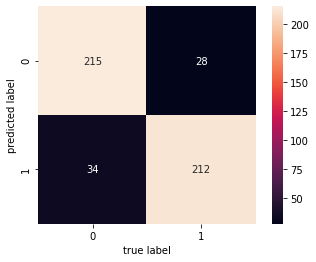

In [ ]:
y_pred_svm2 = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred_svm2) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
print(classification_report(y_test,y_pred_svm2))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       249
           1       0.86      0.88      0.87       240

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489



#### **K-Nearest Neighbors.**

 


KNN algorithm is one of the simplest of all the supervised machine learning algorithms. KNN algorithm simply calculates the distance of a new data point to all other training data points. the distance between data points can be any type. For ex. Euclidean or Manhattan etc. It then selects the K-nearest data points where K can be any integer. The algorithm then assigns the data points to the class to which the majority of the k data points belongs.

KNN algorithm is easy to implement in its basic form but it performs complex classification tasks. It is a lazy learning algorithm because it does not have a specialized training phase, rather it just uses all the data for training when it performs the tasks of classifying a new data point. KNN algorithm does not assume anything about the underlying data so it is a non-parametric learning algorithm. 

#### Implementing KNN Algorithm

Training and Predictions

 

At first step, value of k is initialized to 5. There is no ideal value for k and it is selected after evaluation, but 5 seems to be the most commonaly used value to start out for KNN algorithm. After that the prediction on our test data is made. 

In [ ]:
k = 5
knn_w2v = KNN(X_train,X_test,y_train.to_numpy(),y_test.to_numpy(),k)
y_pred_knn_w2v = knn_w2v.run()
acc = knn.evaluate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn_w2v))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       249
           1       0.85      0.88      0.87       240

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489



#### Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. The scripts are implemented as follows:

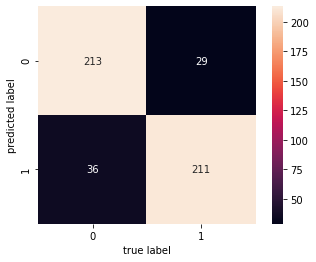

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
mat = confusion_matrix(y_test, y_pred_knn_w2v) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Comparing Error Rate with the K Value

  
 

As mentioned earlier there is no way to know beforehand which value of k yields the best results. Before we just randomly choose the 5 as the k value. One way to find the best value of k is to plot the graph of k value and its corresponding accuracy value for the dataset. Below is the plot for the accuract for the predicted values of test set for all values of k in between 1 and 10.

In [ ]:
acc_list = []
for i in range(1, 10):
    knn_i = KNN(X_train,X_test,y_train.to_numpy(),y_test.to_numpy(),i)
    pred_i = knn_i.run()
    #pred_i = knn.predict(X_test)
    acc_list.append(knn_i.evaluate())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Accuracy')

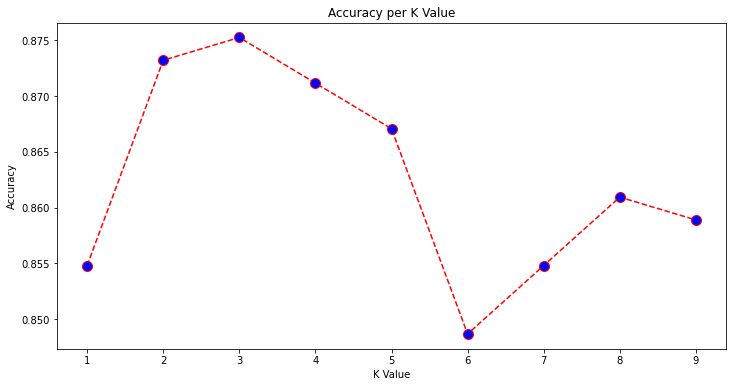

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), acc_list, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy per K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

 

From the graph we can say that the algorithm reaches the highest accuracy with k = 3.

### **Accuracy comparison.**

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy score for linear kernel: {}'.format(accuracy_score(y_test, y_pred_svm2)))
print('Accuracy score for KNN: {}'.format(accuracy_score(y_test, y_pred_knn_w2v)))

NameError: name 'y_pred_svm2' is not defined

## **Conclusion.**
We implemented several classification techniques on a Youtube comments dataset to classify comments as spam comments or ham (not spam) comments. The model proposed in this project consist on tree phases: **dataset cleansing**, which performs a set of techniques to clean and filter the comments in the dataset, **word embedding model construction**, which construct a numerical vector representation of each comment in the dataset, and **classification**, which performs the classification task using the machine learning classifiers:  K-Nearest Neighbors and Support Vector Machines.

Upon the construction of our model, we detected that the most important phase is the word embedding model construction since the resulting numerical vector representation of each comment will be the input to our classifiers and define the accuracy of each classifiers. W**e encountered that both modeling techniques: Bag-of-Words and Word2Vec have their own set of advantages and disadvantages**. 

For the Bag-of-Words, its simplicity its one of the main advantages, since it does not requiere a significat processing power to construct the model, but it does require a significant ammount of memory, since in the resulting array dimension, the number of columns will depend directly to the quantity of words used in the dataset (vocabulary). Since the size of the dataset used in this project is not high, it will not affect the performance of our model, but when the dataset size increases, the dimensions of the vector representation of the comments will also increase, which then will result in a significant increase in the use of resources, memory allocation, and processing time in the classification phase of the project.

The Word2Vec model has a set of advantages since it involves more advancing modeling techniques, and it is not resource demanding as other modeling techniques such as  BERT and GloVE, but the main advantage for this project is that the dimension of the vector representation for each comment is fixed size (1,300), and this decreases greatly the training time and resource usage during the classification phase of our project. One advantage of the Word2Vec implementation is that it can capture the similarities and relations between words.

After testing various test scenarios we can see that with BoW model using the linear rbf classifier gives out the best accuracy at 93% and the 2nd one being BoW model with kNN algorithm at 89%. From this experiment we can conclude that BoW is the best word embedding model to identify spam or ham classification and linear kernel rbf the best classifier considering the accuracy for both BoW and Word2Vec model.